In [1]:
# import python package and relevant libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# Use graphviz to make a chart of the regression tree decision points

from sklearn.externals.six import StringIO
from IPython.display import display
from IPython.display import Image
from sklearn.tree import export_graphviz
from ipywidgets import *
import pydotplus


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Visualizing CARTs with admissions data

In [3]:
# load admission data

admit = pd.read_csv('./datasets/admissions.csv')

In [4]:
admit.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [5]:
admit.shape

(400, 4)

In [6]:
# cleaning data
admit.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [7]:
admit.dropna(axis = 0, inplace = True)

In [8]:
admit.shape

(397, 4)

In [9]:
# Create regression and classification X, y data
Xr = admit[['admit','gre','prestige']]
yr = admit.gpa.values

Xc = admit[['gpa','gre','prestige']]
yc = admit.admit.values

# Cross-validate regression and logistic regression on the data

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
reg_scores = cross_val_score(LinearRegression(), Xr, yr, cv=4)
cls_scores = cross_val_score(LogisticRegression(), Xc, yc, cv=4)

print((reg_scores, np.mean(reg_scores)))
print((cls_scores, np.mean(cls_scores)))

linreg = LinearRegression().fit(Xr, yr)
logreg = LogisticRegression().fit(Xc, yc)

(array([0.22470964, 0.08296819, 0.03204903, 0.16434809]), 0.12601873539032837)
(array([0.71      , 0.72      , 0.68686869, 0.70408163]), 0.7052375798804369)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Building regression trees

In [12]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [13]:
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [14]:
dtr1.fit(Xr, yr)
dtr2.fit(Xr, yr)
dtr3.fit(Xr, yr)
dtrN.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [15]:
dtr1_scores = cross_val_score(dtr1, Xr, yr, cv=4)
dtr2_scores = cross_val_score(dtr2, Xr, yr, cv=4)
dtr3_scores = cross_val_score(dtr3, Xr, yr, cv=4)
dtrN_scores = cross_val_score(dtrN, Xr, yr, cv=4)

print((dtr1_scores, np.mean(dtr1_scores)))
print((dtr2_scores, np.mean(dtr2_scores)))
print((dtr3_scores, np.mean(dtr3_scores)))
print((dtrN_scores, np.mean(dtrN_scores)))

(array([0.16618105, 0.1535036 , 0.03860296, 0.10081223]), 0.11477496110421054)
(array([0.20722899, 0.14179888, 0.04112242, 0.11836674]), 0.12712925798583746)
(array([0.15422529, 0.123802  , 0.05252648, 0.08070045]), 0.10281355747790247)
(array([-0.1467712 , -0.15835462, -0.46756618, -0.19259235]), -0.24132108509547462)


In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')

True

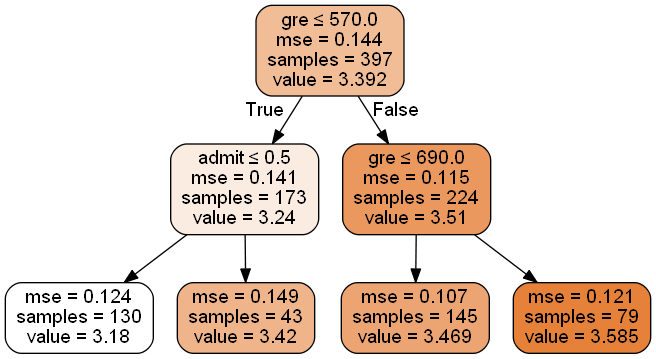

In [19]:
dot_data = StringIO()  

export_graphviz(dtr2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

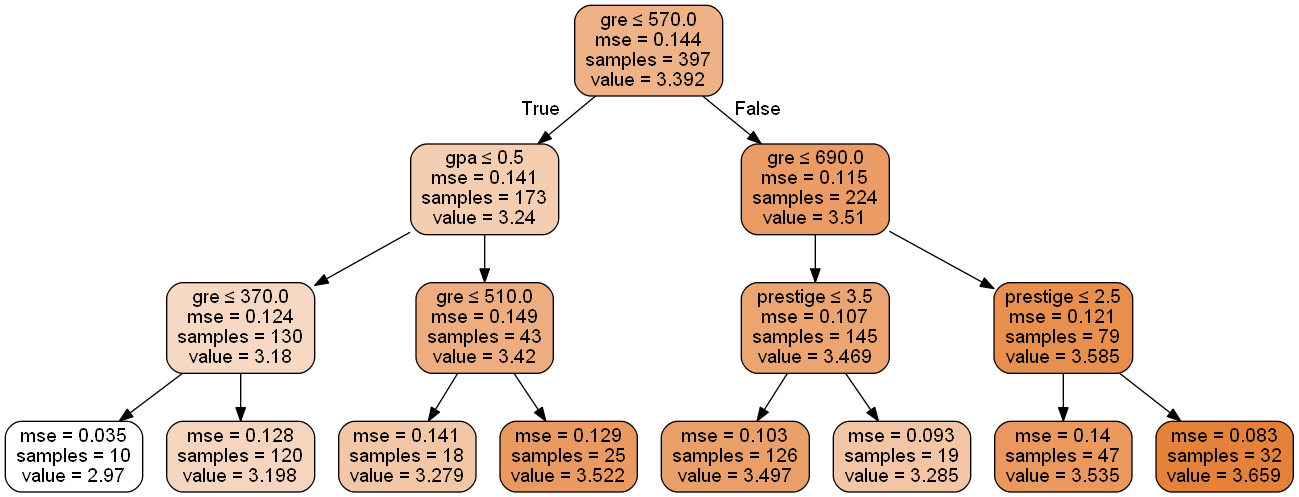

In [20]:
dot_data = StringIO()  

export_graphviz(dtr3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

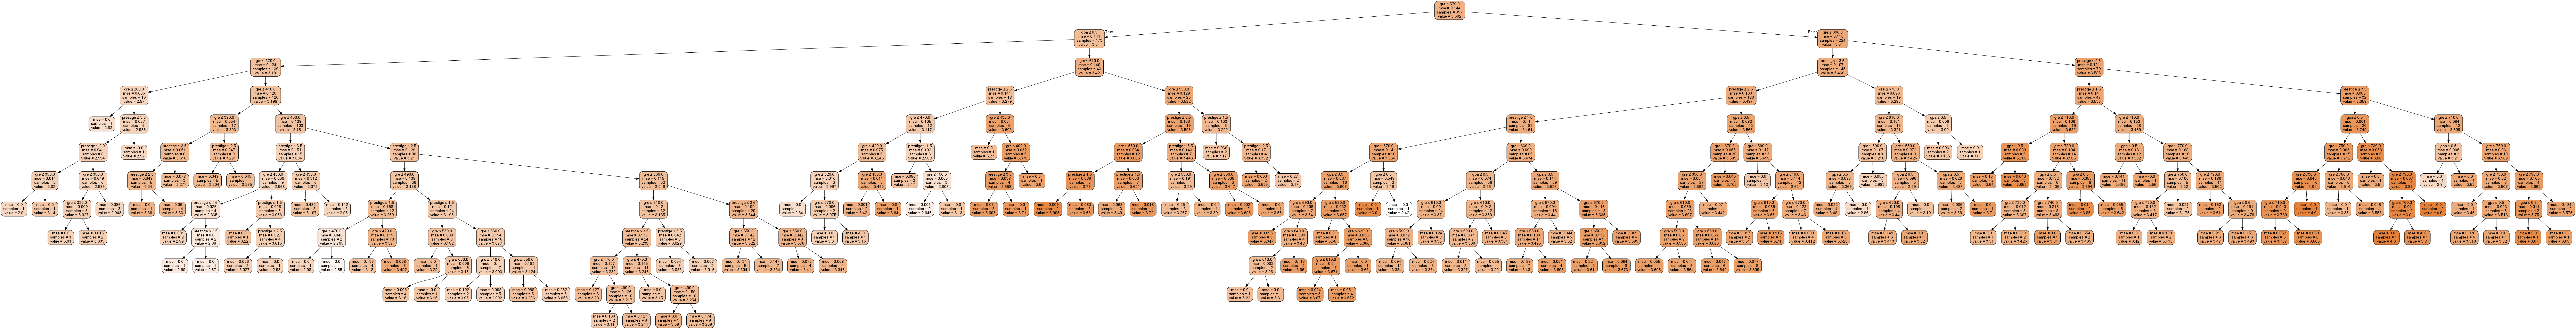

In [21]:
dot_data = StringIO()  

export_graphviz(dtrN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Building classification trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [24]:
dtc1.fit(Xc, yc)
dtc2.fit(Xc, yc)
dtc3.fit(Xc, yc)
dtcN.fit(Xc, yc)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
dtc1_scores = cross_val_score(dtc1, Xc, yc, cv=4)
dtc2_scores = cross_val_score(dtc2, Xc, yc, cv=4)
dtc3_scores = cross_val_score(dtc3, Xc, yc, cv=4)
dtcN_scores = cross_val_score(dtcN, Xc, yc, cv=4)

print((dtc1_scores, np.mean(dtc1_scores)))
print((dtc2_scores, np.mean(dtc2_scores)))
print((dtc3_scores, np.mean(dtc3_scores)))
print((dtcN_scores, np.mean(dtcN_scores)))

(array([0.68      , 0.68      , 0.66666667, 0.68367347]), 0.6775850340136055)
(array([0.69      , 0.77      , 0.62626263, 0.62244898]), 0.6771779014636158)
(array([0.77      , 0.77      , 0.60606061, 0.70408163]), 0.7125355596784169)
(array([0.61      , 0.69      , 0.57575758, 0.55102041]), 0.6066944959802102)


# Visualize the classification trees

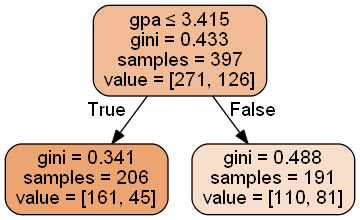

In [26]:
dot_data = StringIO()  

export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

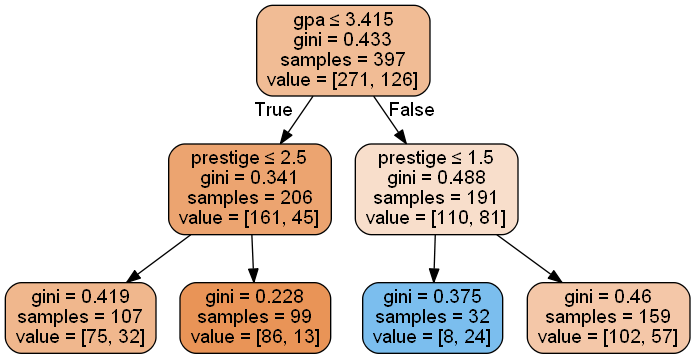

In [27]:
dot_data = StringIO()  

export_graphviz(dtc2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

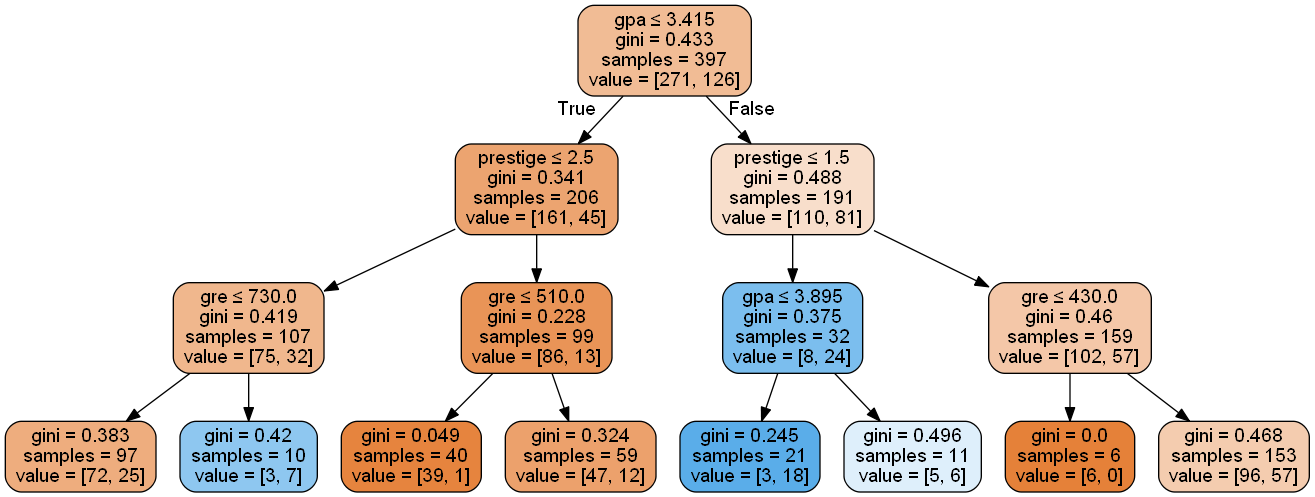

In [28]:
dot_data = StringIO()  

export_graphviz(dtc3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

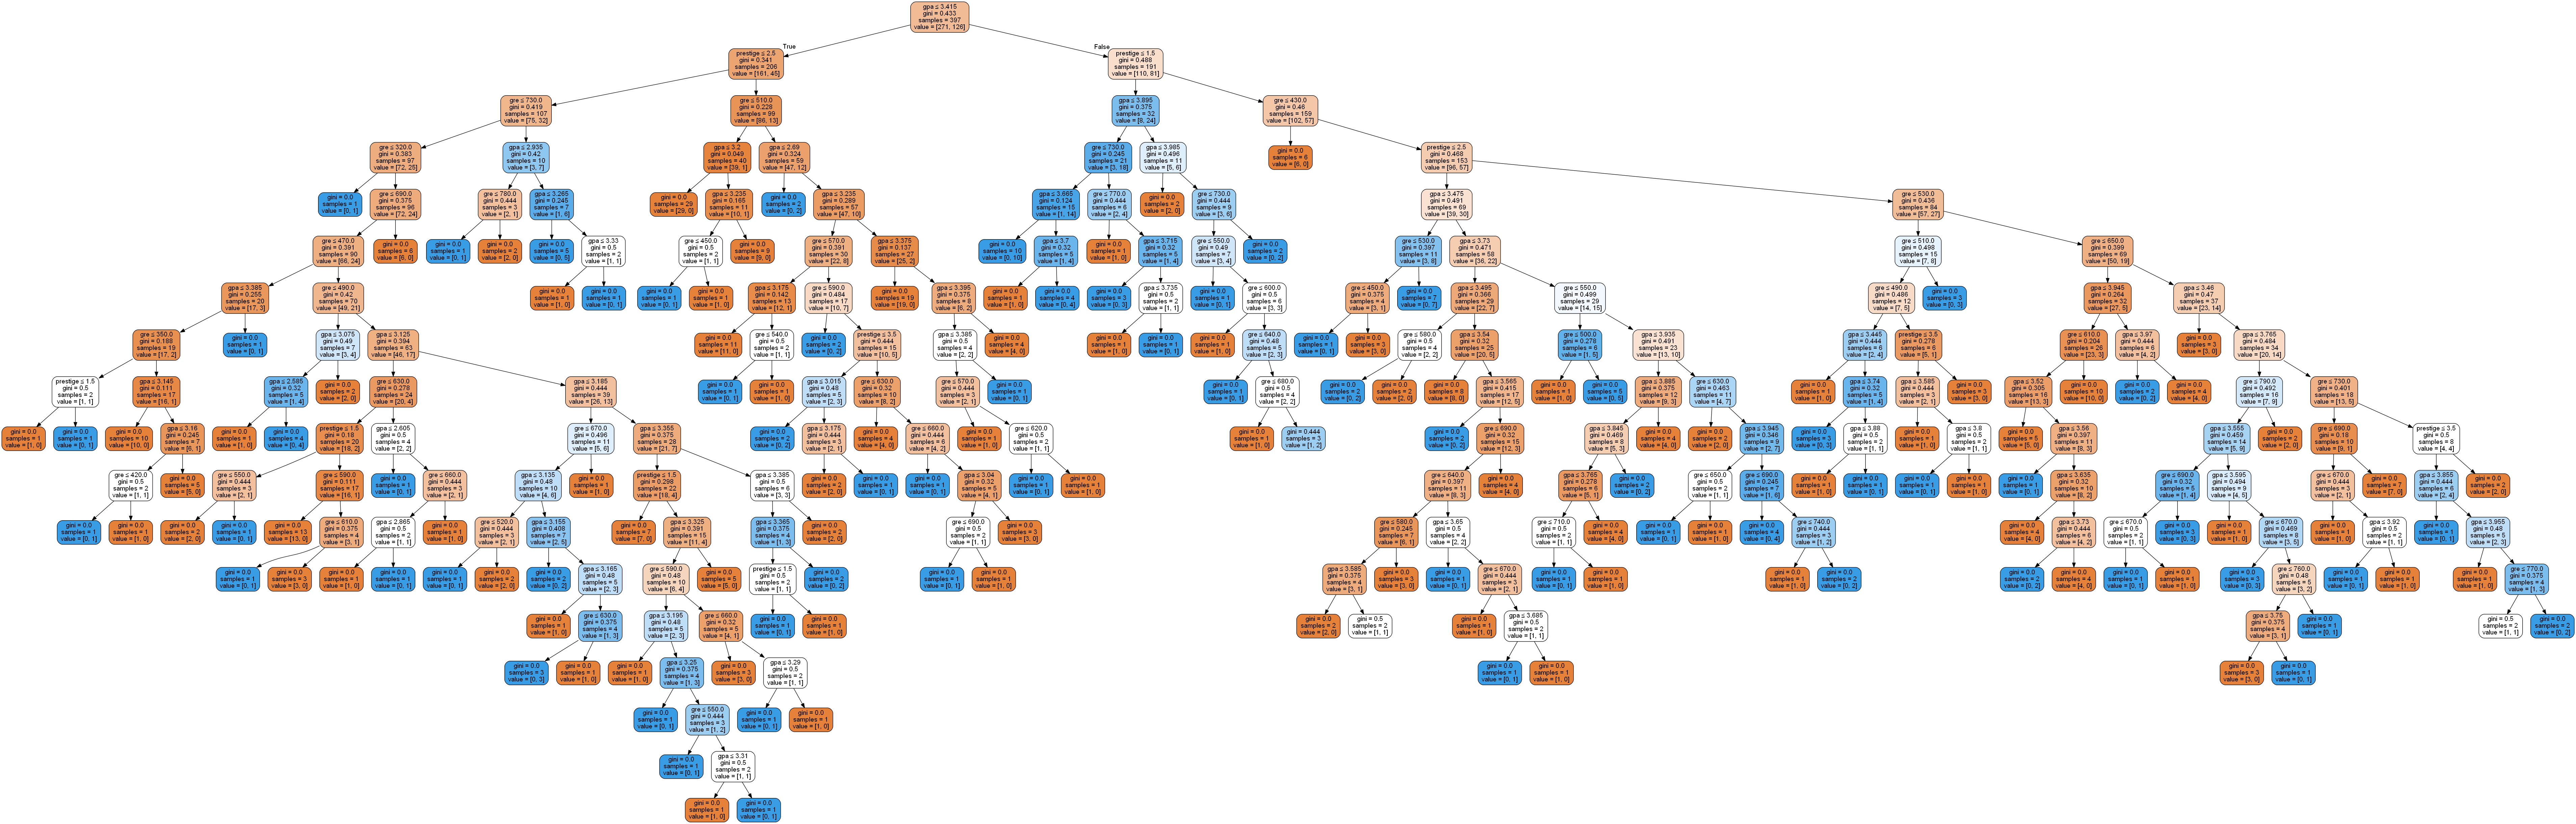

In [29]:
dot_data = StringIO()  

export_graphviz(dtcN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Using GridSearchCV to find the best decision tree classifier

In [30]:
col = pd.read_csv('./datasets/College.csv')

In [31]:
col.head(2)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56

In [32]:
y = col.Private.map(lambda x: 1 if x == 'Yes' else 0)
X = col.iloc[:, 2:]

In [33]:
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [34]:
dtc_gs.fit(X, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:   15.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 2, 3, 4],
                         'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5],
 

In [35]:
dtc_best = dtc_gs.best_estimator_
print((dtc_gs.best_params_))
print((dtc_gs.best_score_))

{'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 50}
0.9163449163449163


In [36]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

feature  importance
2        Enroll    0.639728
15       Expend    0.180669
13    S.F.Ratio    0.131471
0          Apps    0.026950
7      Outstate    0.021182
10     Personal    0.000000
14  perc.alumni    0.000000
12     Terminal    0.000000
11          PhD    0.000000
8    Room.Board    0.000000
9         Books    0.000000
1        Accept    0.000000
6   P.Undergrad    0.000000
5   F.Undergrad    0.000000
4     Top25perc    0.000000
3     Top10perc    0.000000
16    Grad.Rate    0.000000